In [4]:
import os
import matplotlib.pyplot as plt
import csv
import numpy

files = os.listdir('data/av')

In [5]:
def node_sim(N, k):

        counter = 0
        avg_y = []

        for f in os.listdir('data/av'):

                with open(f'data/av/{f}', mode ='r') as file:
                        nodes = int(f.split("_")[-4])

                        if nodes != N: continue

                        iteration = int(f.split("_")[-2])

                        initial = int(f.split("_")[-1].split('.')[0])

                        if initial != k: continue

                        # reading the CSV file
                        csvFile = csv.reader(file)

                        x = []
                        y = []
                        
                        # displaying the contents of the CSV file
                        for lines in csvFile:
                                x.append(float(lines[0]))
                                y.append(float(lines[1])/10)

                        counter += 1
                        avg_y.append(y)
        print(counter)
        return avg_y


In [6]:
def calc_avg_per_sim(listoflists, N):
    
    return [sum(x) / N  for x in zip(*listoflists)]


10
10
10


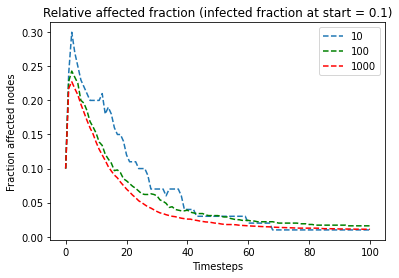

In [7]:

ten = calc_avg_per_sim(node_sim(10, 1), 10)
h = calc_avg_per_sim(node_sim(100, 10), 100)
d = calc_avg_per_sim(node_sim(1000, 100), 1000)


import numpy 
import matplotlib.pyplot as plt

t = numpy.arange(0,101,1)

one = list(zip(ten, t))
two = list(zip(h, t))
three = list(zip(d, t))

l = [10, 100, 1000]
 
# red dashes, blue squares and green triangles
plt.plot(t, ten, '--', label = 10)
plt.plot(t, h, 'g--', label = 100)
plt.plot(t, d, 'r--', label = 1000)
plt.ylabel('Fraction affected nodes')
plt.xlabel('Timesteps')
plt.legend()
plt.title('Relative affected fraction (infected fraction at start = 0.1)')
plt.savefig(f"rel_01_er", dpi=200)
plt.show()

10
10
10
10
10


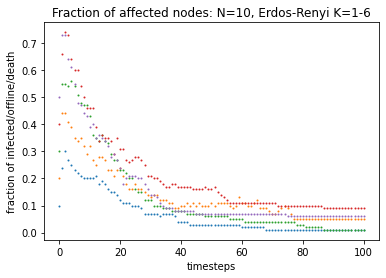

10
10
10
10
10


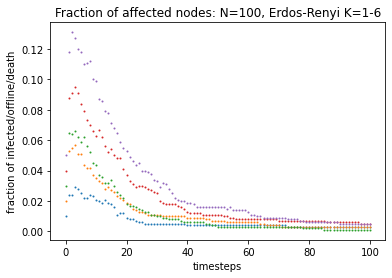

10
10
10
10
10


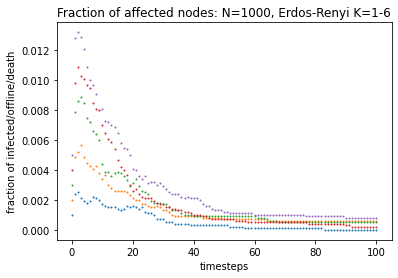

In [8]:
for N in [10, 100, 1000]:
    for k in range(1, 6):
        
        d = calc_avg_per_sim(node_sim(N, k), N)
        t = numpy.arange(0,101,1)

        # red dashes, blue squares and green triangles
        plt.scatter(t, d, s = 1)
        plt.ylabel("fraction of infected/offline/death")
        plt.xlabel("timesteps")
        plt.title(f"Fraction of affected nodes: N={N}, Erdos-Renyi K=1-6")
        plt.savefig(f"ER_{N}", dpi=200)

    plt.show()